# K-means clustering algorithm

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

**"It is an iterative algorithm that divides the unlabeled dataset into k different clusters in such a way that each dataset belongs only one group that has similar properties."** It allows us to cluster the data into different groups and a convenient way to discover the categories of groups in the unlabeled dataset on its own without the need for any training. Here, we will follow two approaches: 

1. K-means from scratch
2. Using Scikit-Learn's KMeans module

## Import libraries

In [2]:
# Import required libraries
import pandas as pd
import numpy as np

# Plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## K-means from scratch

### Load the data

In [2]:
# Load the data
data = pd.read_csv('datasets/clustering.csv')

# Check the data
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
# Print the shape and columns of the data
print('Shape:', data.shape)
print('Columns:', data.columns)

Shape: (381, 13)
Columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


### Play with the data

In [4]:
# Store specific columns to a variable X
X = data[['LoanAmount', 'ApplicantIncome']]
X.head()

,LoanAmount,ApplicantIncome
0,128.0,4583
1,66.0,3000
2,120.0,2583
3,141.0,6000
4,95.0,2333


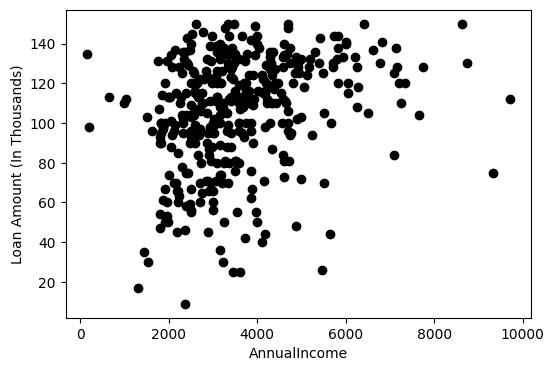

In [5]:
# Visualise data points by plotting a scatterplot
plt.figure(figsize = (6, 4))
plt.scatter(X['ApplicantIncome'], X['LoanAmount'], c = 'black')

plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')

plt.show()

### Choose the number of clusters (k) and select a random centroid for each cluster

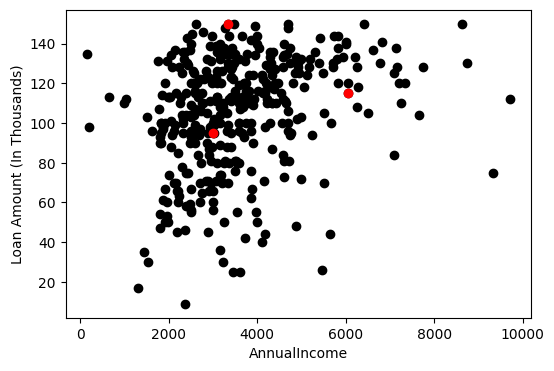

In [6]:
# Number of clusters
K = 3

# Select random observation as centroids
Centroids = (X.sample(n = K))
plt.figure(figsize = (6, 4))

plt.scatter(X['ApplicantIncome'], X['LoanAmount'], c = 'black')
plt.scatter(Centroids['ApplicantIncome'], Centroids['LoanAmount'],c='red')

plt.xlabel('AnnualIncome')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

In [7]:
### Step 1 - Assign all the points to the closest cluster centroid
### Step 2 - Recompute centroids of newly formed clusters
### Step 3 - Repeat step 2 and 3.

diff = 1
j = 0

while(diff!=0):
    X_d = X
    i = 1
    for index1, row_c in Centroids.iterrows():
        ED = []
        # Calculate the Euclidean distance for all the points, and choose the minimum distance
        for index2, row_d in X_d.iterrows():
            d1 = (row_c['ApplicantIncome'] - row_d['ApplicantIncome'])**2
            d2 = (row_c['LoanAmount'] - row_d['LoanAmount'])**2
            d = np.sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1

    C = []
    # Calculate the minimum distance
    for index, row in X.iterrows():
        min_dist = row[1]
        pos = 1
        for i in range(K):
            if row.iloc[i + 2] < min_dist:
                min_dist = row.iloc[i+2]
                pos = i + 1
        C.append(pos)
        
    X['Cluster'] = C
    Centroids_new = X.groupby(['Cluster']).mean()[['LoanAmount', 'ApplicantIncome']]
    
    if j == 0:
        diff = 1
        j = j + 1
    else:
        diff = (Centroids_new['LoanAmount'] - Centroids['LoanAmount']).sum() + (Centroids_new['ApplicantIncome'] - Centroids['ApplicantIncome']).sum()
        print('Sum:', diff.sum())
        
    Centroids = X.groupby(['Cluster']).mean()[['LoanAmount','ApplicantIncome']]

Sum: 192.36855630684414
Sum: 255.53986373335397
Sum: 69.5956789047341
Sum: 80.42253001270922
Sum: 99.50821192263949
Sum: 27.38200063816943
Sum: 18.274686272279013
Sum: 9.21023994083339
Sum: 18.345487493007468
Sum: 46.27013250786139
Sum: 0.0


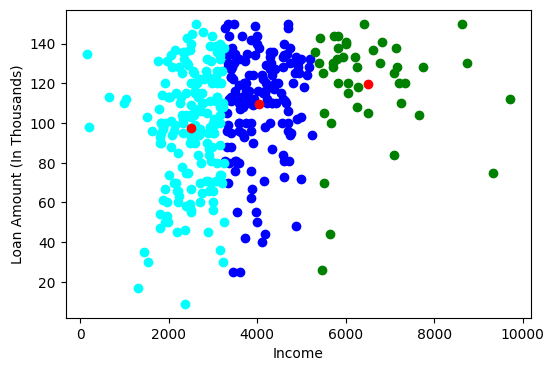

In [9]:
color = ['blue', 'green', 'cyan']
plt.figure(figsize = (6, 4))

# Plot the segregated data
for k in range(K):
    data = X[X['Cluster'] == k + 1]
    plt.scatter(data['ApplicantIncome'], data['LoanAmount'],c = color[k])

# Plot the centroids
plt.scatter(Centroids['ApplicantIncome'], Centroids['LoanAmount'],c='red')

plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands)')
plt.show()

## Scikit-Learn's KMeans module

### Load the data

In [3]:
# Load the data
data = pd.read_csv('datasets/student_evaluation.csv')

# Check the data
data.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


### Perform K-means

In [5]:
# Create a Kmeans instance
kmeans = KMeans(n_clusters = 3)

kmeans.fit(data)

KMeans(n_clusters=3)

In [6]:
# Evaluate the predictions
pred = kmeans.predict(data)

print('Predictions:', pred)

Predictions: [0 0 2 ... 2 1 1]


In [8]:
# print the value counts
pd.Series(pred).value_counts()

0    2365
2    2220
1    1235
Name: count, dtype: int64

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters (K).

In [12]:
print('Inertia:', round(kmeans.inertia_, 3))

Inertia: 180376.297


In [13]:
# Print score of the data
print('Score:', kmeans.score(data))

Score: -180376.29700753384


In [15]:
# Evaluating the inertia from K = 1 to K = 20
SSE = []

# Appending the values to the list
for cluster in range(1, 20):
    kmeans = KMeans(init = 'k-means++', n_clusters = cluster)
    kmeans.fit(data)
    SSE.append(kmeans.inertia_)

inertia_data = pd.DataFrame({'Cluster': range(1,20), 'SSE':SSE})
inertia_data.head()

,Cluster,SSE
0,1,373025.672852
1,2,231527.967155
2,3,180375.766595
3,4,153628.468149
4,5,133016.516186


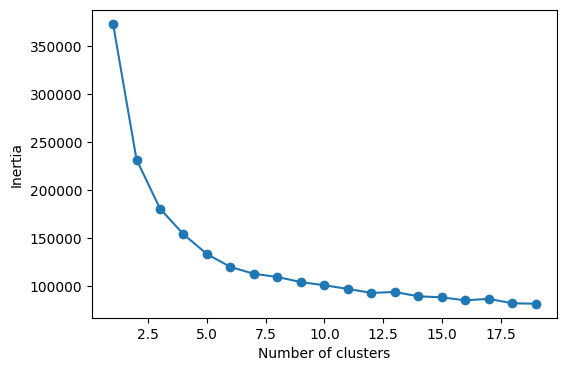

In [19]:
plt.figure(figsize=(6,4))

# Plot the cluster and SSE points
plt.plot(inertia_data['Cluster'], inertia_data['SSE'], marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.show()

### Scale the data

In [20]:
# Perform Standard Scaler technique
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pd.DataFrame(data_scaled).describe().round(3)

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
count,5820.000,5820.000,5820.000,5820.000,5820.000,5820.000,5820.000,5820.000,5820.000,5820.000,...,5820.000,5820.000,5820.000,5820.000,5820.000,5820.000,5820.000,5820.000,5820.000,5820.000
mean,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,-0.000,-0.000,...,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000,-0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-2.068,-1.702,-0.402,-1.136,-1.322,-1.439,-1.614,-1.738,-1.621,-1.647,...,-1.783,-1.790,-1.817,-1.827,-1.730,-1.698,-1.839,-1.749,-1.668,-1.805
25%,-0.676,-0.888,-0.402,-1.136,-1.322,-0.693,-0.836,-0.940,-0.843,-0.865,...,-0.206,-0.224,-0.242,-0.250,-0.945,-0.915,-0.249,-0.962,-0.894,-0.241
50%,0.716,-0.075,-0.402,-0.458,0.161,0.052,-0.057,-0.143,-0.064,-0.083,...,-0.206,-0.224,-0.242,-0.250,-0.159,-0.131,-0.249,-0.175,-0.120,-0.241
75%,0.716,0.739,-0.402,0.898,0.902,0.798,0.721,0.655,0.714,0.699,...,0.582,0.560,0.545,0.538,0.627,0.653,0.547,0.612,0.654,0.541
max,0.716,1.552,3.355,1.576,1.643,1.544,1.499,1.453,1.493,1.481,...,1.371,1.343,1.333,1.327,1.413,1.437,1.342,1.399,1.428,1.323


In [21]:
# Calculate inertia and Kmeans predictions again
SSE_scaled = []

for cluster in range(1, 20):
    kmeans = KMeans(init = 'k-means++', n_clusters = cluster)
    kmeans.fit(data_scaled)
    SSE_scaled.append(kmeans.inertia_)

inertia_scaled = pd.DataFrame({'Cluster': range(1,20), 'SSE': SSE_scaled})
inertia_scaled.head()

,Cluster,SSE
0,1,192060.000000
1,2,105150.066550
2,3,73956.576471
3,4,68446.641054
4,5,60429.470923


Text(0, 0.5, 'SSE')

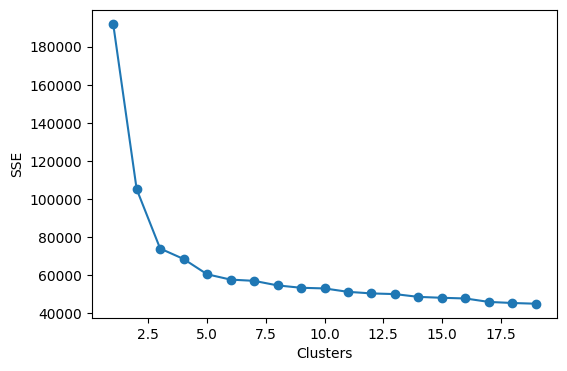

In [22]:
plt.figure(figsize=(6, 4))

# Plot the graph
plt.plot(inertia_scaled['Cluster'], inertia_scaled['SSE'], marker='o')
plt.xlabel('Clusters')

plt.ylabel('SSE')

### Perform K-means again

In [23]:
# Create the instance of the model
kmeans = KMeans(init = 'k-means++', n_clusters = 5)

# Fit the model
kmeans.fit(data_scaled)

pred = kmeans.predict(data_scaled)

print('Predictions:', pred)

Predictions: [3 3 2 ... 2 0 0]


In [24]:
# print the value counts
pd.Series(pred).value_counts()

3    2051
0    1192
4    1078
2     845
1     654
Name: count, dtype: int64